A ipython notebook explaining linear regression and gradient descent for machine learning.

First, I'll import all the packages I'll be using for this script:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np

First, let me generate the data I will use to show how to use linear regression and gradient descent for machine learning

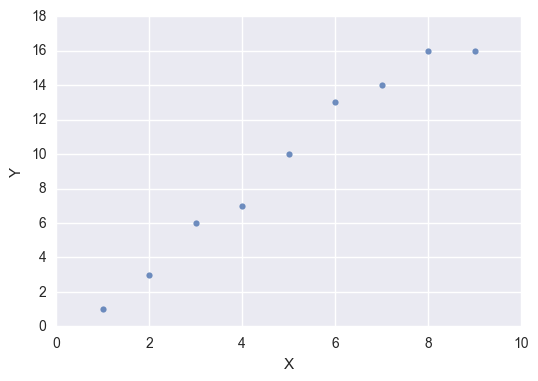

In [3]:
df=pd.DataFrame(columns=['X','Y']);
df['X']=[1,2,3,4,5,6,7,8,9];
df['Y']=[1,3,6,7,10,13,14,16,16];
sns.regplot(x='X',y='Y',data=df,fit_reg=False);

By eye, a human could say this data is roughly on a linear line. If we wanted to fit it to a y=a*x+b model, we could guess a=2 and b=0, and be pretty close. I'll write a def for such a fit, called the hypothesis, where H(Theta0,Theta1,x) is the same as a*x+b:

In [4]:
def H(Theta0,Theta1,x):
    hypothesis=Theta0*1.0+Theta1*x;
    return hypothesis

Let me plug in the eyeball'd values to see how well they correspond with the curve:

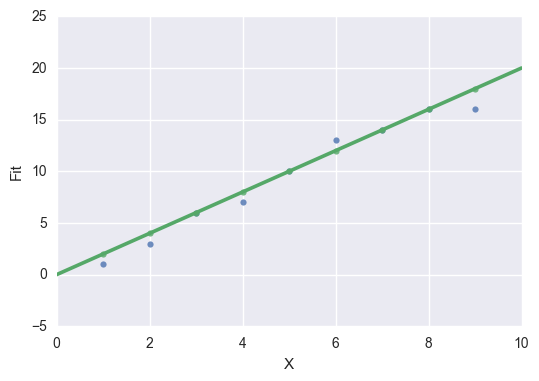

In [5]:
df['Fit']=H(0,2,df['X'])
sns.regplot(x='X',y='Y',data=df,fit_reg=False)
sns.regplot(x='X',y='Fit',data=df)

That looks pretty good. But of course, the line doesn't hit every data point perfectly. We can calculate how far away each data point is from the fitted curve by calculating something call the Cost Function. 

J(Theta0,Theta1)=1/(2 x #datapoints) x Sum((datapointValue-fittedValue)^2)

In [6]:
def Cost(dataframe, real, hypothesis):
    return 1/(2*len(dataframe))*np.sum((dataframe[real]-hypothesis)**2)

I can then calculate the Cost Function of my eyeballed fit. The lower the value, the better.

In [7]:
print(Cost(df,'Y',H(0,2,df['X'])))

0.4444444444444444


If I had been worse at guessing, the cost function would be higher:

In [8]:
print(Cost(df,'Y',H(1,1,df['X'])))

10.11111111111111


As I vary the parameters Theta0 and Theta1, the cost function will change. There will exist a minimum value of the cost function at the best fit. If I plot the cost function value for various values of Theta0 and Theat1, I should see this minium.

For now, let me fix Theta0 at 0 and only worry about varying Theta1:

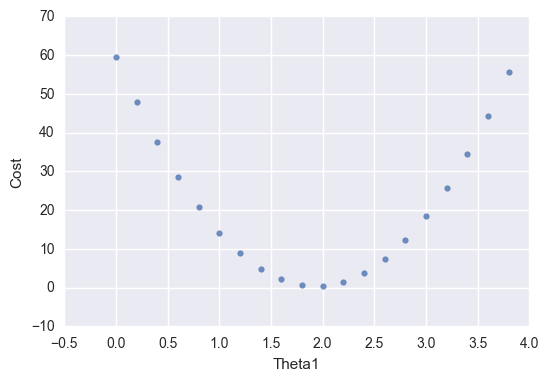

In [9]:
CostTable=pd.DataFrame(columns=['Theta0','Theta1','Cost']);
CostTable['Theta0']=list(np.zeros(20));
CostTable['Theta1']=np.array(range(0,20))*.2;
for x in range(0,len(CostTable)):
    T0=CostTable.loc[x,'Theta0'];
    T1=CostTable.loc[x,'Theta1'];
    CostTable.loc[x,'Cost']=Cost(df,'Y',H(T0,T1,df['X']));
sns.regplot(x='Theta1',y='Cost',data=CostTable,fit_reg=False);

By eye, we can see the minimum value is very close to 2.

The question is, how would a computer be able to see that. The answer is to use <b>gradient descent</b>.

Gradient descent will let the computer start at any initial value for Theta1 and automatically find the value which minimizes the cost function. It does this by finding the derivative of the cost function curve (shown above) and using the sign of the resulting value to choose a new value for Theta1 which is closer to the optimum value.

alpha here helps set the step size. A large alpha means Theta1 will change more. However, there's a risk in that (more on that later).

In [10]:
def GradDescent(Theta0,Theta1,alpha):
    hypothesis=H(Theta0,Theta1,df['X']);
    loss=df['Y']-hypothesis #this should look familiar. It's in the cost function as well. But here it is not squared.
    xTrans=df['X'].transpose()
    gradient=np.dot(xTrans,loss)/len(df) #Here's the 'derivative' line.
    costVal=Cost(df, 'Y', hypothesis)
    return Theta1+alpha*gradient, costVal
#I'm returning 2 useful values here.
#The first is the new value for Theta1. It is closer to the optimum value.
#The second is the cost function for the original Theta1 value.
#As Theta1 gets closer to the optimum value, costVal should decrease.

Using gradient descent, I can repeatedly find Theta1 values closer and closer to the optimum value.

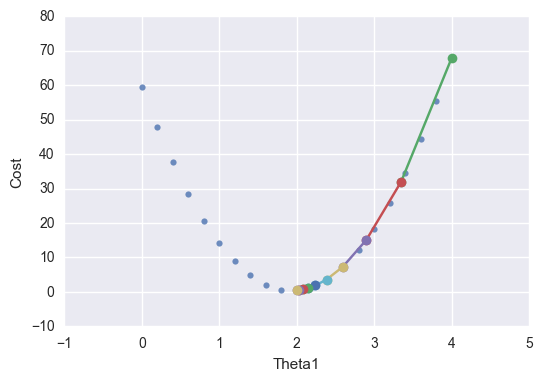

In [11]:
Theta1=4.
CostMapping=pd.DataFrame(columns=['Theta1','Cost'])
for x in range(0,10):
    CostMapping.loc[x,'Theta1']=Theta1;
    Theta1,cost=GradDescent(0,Theta1,.01);
    CostMapping.loc[x,'Cost']=cost;
    df['Fit%s'%(x)]=H(T0,Theta1,df['X']) #snuck this line in for the following plot.
sns.regplot(x='Theta1',y='Cost',data=CostTable,fit_reg=False)
for x in range(0,len(CostMapping)):
    plt.plot(CostMapping.loc[x:x+1,'Theta1'], CostMapping.loc[x:x+1,'Cost'], '-o')

See how as the Theta1 values change, the hypothesis function does a better and better job of fitting the data points.

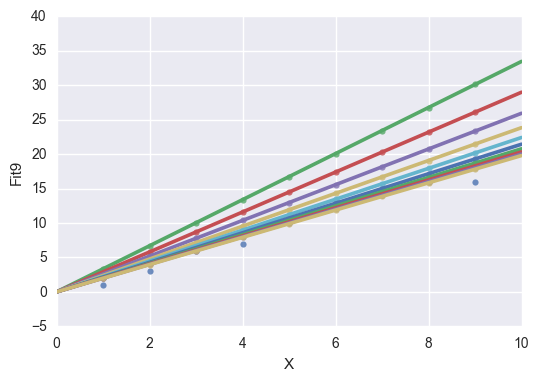

In [12]:
sns.regplot(x='X',y='Y',data=df,fit_reg=False)
for x in range(0,len(CostMapping)):
    sns.regplot(x='X',y='Fit%s'%(x),data=df,ci=None)


An equivalent parameter to watch to observe the improvement in the fit is the cost function. As the fit gets better, the cost function will decrease.

0.44544151734794724


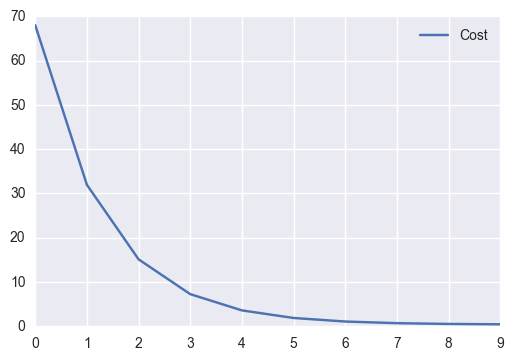

In [13]:
CostMapping.plot(y='Cost')
print(CostMapping.loc[len(CostMapping)-1,'Cost'])

Before going any farther, let me point out the importance of the right sized alpha.

Too small, and it will take forever to reach the optimal value for Theta1.

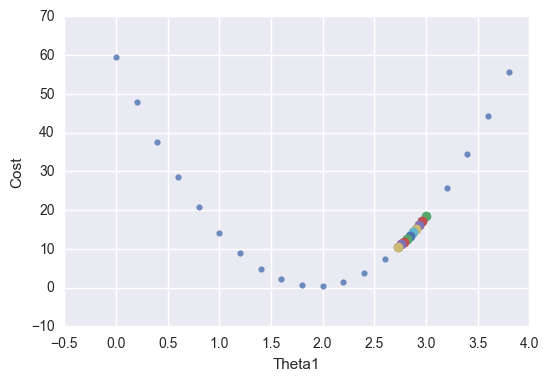

In [15]:
CostMapping=pd.DataFrame(columns=['Theta1','Cost'])
Theta1=3.
for x in range(0,10):
    CostMapping.loc[x,'Theta1']=Theta1;
    Theta1,cost=GradDescent(0,Theta1,.001)
    CostMapping.loc[x,'Cost']=cost;
sns.regplot(x='Theta1',y='Cost',data=CostTable,fit_reg=False)
for x in range(0,len(CostMapping)):
    plt.plot(CostMapping.loc[x:x+1,'Theta1'], CostMapping.loc[x:x+1,'Cost'], '-o')

10.468408253319277


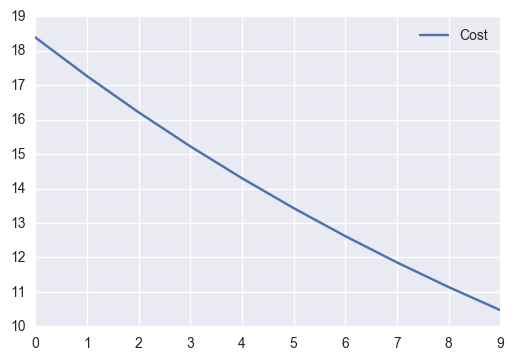

In [16]:
CostMapping.plot(y='Cost')
print(CostMapping.loc[len(CostMapping)-1,'Cost'])

If alpha is too large, gradiant descent will backfire.

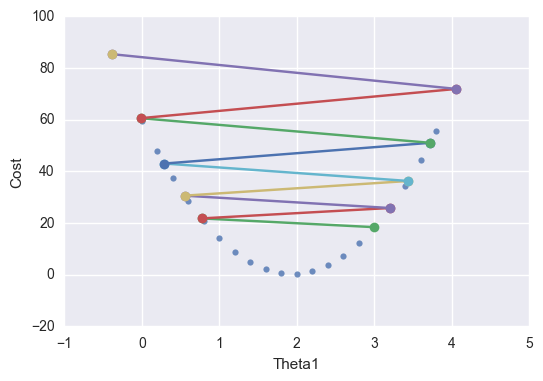

In [26]:
CostMapping=pd.DataFrame(columns=['Theta1','Cost'])
Theta1=3
for x in range(0,10):
    CostMapping.loc[x,'Theta1']=Theta1;
    Theta1,cost=GradDescent(0,Theta1,.066)
    CostMapping.loc[x,'Cost']=cost;
sns.regplot(x='Theta1',y='Cost',data=CostTable,fit_reg=False)
for x in range(0,len(CostMapping)):
    plt.plot(CostMapping.loc[x:x+1,'Theta1'], CostMapping.loc[x:x+1,'Cost'], '-o')

85.35212485067554


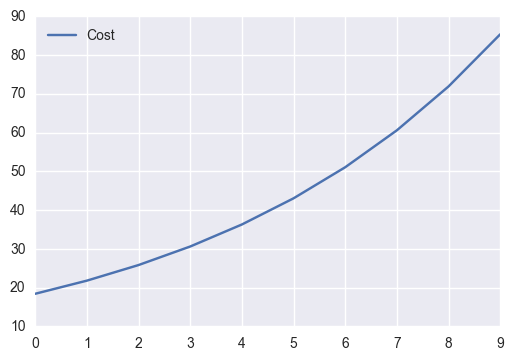

In [27]:
CostMapping.plot(y='Cost')
print(CostMapping.loc[len(CostMapping)-1,'Cost'])

If the cost function ever increases, something has gone terribly, terribly wrong.

Finally, let's unfreeze Theta0 and optimize it with gradient descent as well. 

In [28]:
def GradDescent(Theta0,Theta1,alpha):
    hypothesis=H(Theta0,Theta1,df['X']);
    loss=df['Y']-hypothesis
    xTrans=df['X'].transpose()
    gradient=np.dot(xTrans,loss)/len(df)
    x0=np.ones(len(df)); #remember, y=a*x+b is equivalent to y=a*x+b*1. So we'll need a constant array of 1s.
    gradient0=np.dot(x0,loss)/len(df)
    costVal=Cost(df, 'Y', hypothesis)
    return Theta0+alpha*gradient0, Theta1+alpha*gradient, costVal

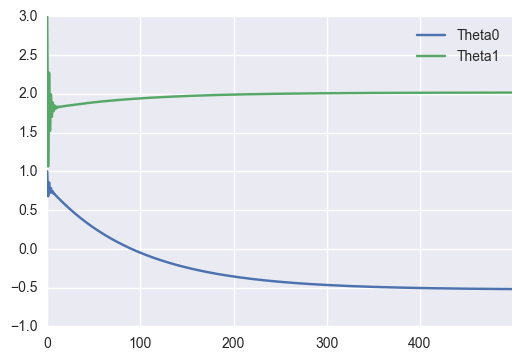

In [30]:
CostMapping=pd.DataFrame(columns=['Theta0','Theta1','Cost'])
Theta1=3;
Theta0=1;
for x in range(0,500):
    CostMapping.loc[x,'Theta1']=Theta1;
    CostMapping.loc[x,'Theta0']=Theta0;
    Theta0,Theta1,cost=GradDescent(Theta0,Theta1,.05)
    CostMapping.loc[x,'Cost']=cost;
CostMapping.plot(y=['Theta0','Theta1'])

0.34475941591483333


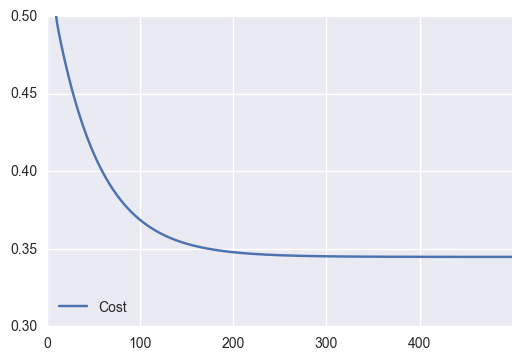

In [31]:
CostMapping.plot(y='Cost',ylim=[.3,.5])
print(CostMapping.loc[len(CostMapping)-1,'Cost'])

By now you'll have noticed that gradient descent has diminishing returns. The parameters Theta0 and Theta1 never get to the optimum values. Instead, they get very close but never reach the apex. When writing a machine learning code using gradient descent, you should put a break command into your code to stop the loop when you're 'close enough' to the optimum values.

One way to do that is monitor the cost function. At first it changes a lot on each pass of the loop. But eventually, it slows down. If the difference between the cost function of one loop and the next is smaller than some set amount, we can tell the loop to break.

291


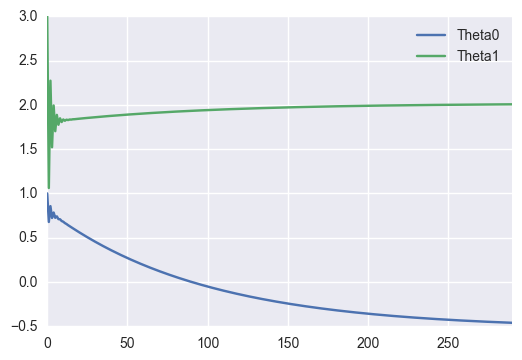

In [49]:
CostMapping=pd.DataFrame(columns=['Theta0','Theta1','Cost'])
Theta1=3;
Theta0=1;
for x in range(0,500):
    CostMapping.loc[x,'Theta1']=Theta1;
    CostMapping.loc[x,'Theta0']=Theta0;
    Theta0,Theta1,cost=GradDescent(Theta0,Theta1,.05)
    CostMapping.loc[x,'Cost']=cost;
    if x>1:
        if CostMapping.loc[(x-1),'Cost']-CostMapping.loc[x,'Cost']<10**-5:
            break
CostMapping.plot(y=['Theta0','Theta1']);
print(len(CostMapping))

Fin.